# Webinaire [IAS](https://www.ias.sn/)  ---- 05/11/2023
# **Reconnaissance des Panneaux de signalisation**
# Classification d'images du jeu de données [**GTSRB**](https://benchmark.ini.rub.de/gtsrb_news.html) avec Keras et TensorFlow utilisant la Convolution Neural Network CNN.

Auteur: [Papa Séga WADE](https://solo.to/mathspsw)

---

# **Plan**

---

### **1) Chargement, affichage et préparation des données**
### **2) Créations de nos différents modèles**
### **3) Techniques d'apprentissage par transfert**
### **4) Un mini projet à la fin (pour celui qui veut implémenter un réseau de neurones historique: AlexNet  !)**


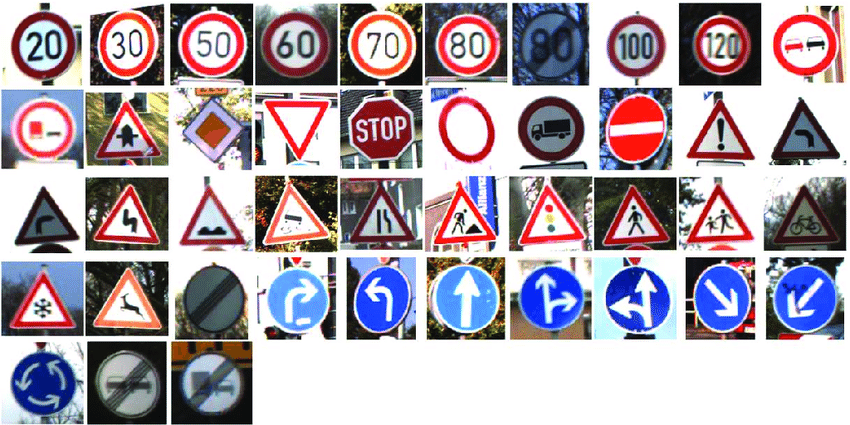

In [ ]:
## Importation des librairies de python

import os
import pandas as pd   # classique dataframe
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings
import zipfile   # à uitliser si vous avez télécharger les images en local, attention temps de chargement long !
import tensorflow_hub as hub # pour faire l'export d'un modèle pré-enytraîner si on le souahite à la fin (VGG19)
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

# Chargement des données
## /!\ Attention : le temps de chargement depuis un répertoire de votre dossier est très long ! le mieux est de uploader depuis votre drive comme j'ai expliquer en bas.

- Les données consistent en plus de 50000 images de panneaux de signalisation appartenant à 43 classes différentes.
- Le dossier `Meta` contient une image de chaque classe.
- Le dossier `Train` contient plus de 39000 images pour l'entraînement et le dossier `Test` contient environ 12000 images.
- Les fichiers csv contiennent la dimension de l'image, son chemin et le label correspondant.

Vous pouvez trouvez les données dans le site du projet GTSRB ou sur kaggle.
 ([website](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset), [kaggle](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign))

 # **Cependant le plus simple et plus rapide est de recupérer les données depuis ce lien de Drive que j'ai crée car j'ai déjà converti les images du format d'origne .ppm en .jpeg [Drive datasets psw](https://drive.google.com/drive/folders/1t43GSfoWpR68SG8SNgP0A-52kacCS8AI) puis de faire une copie dans votre drive.**

# **Imporation des données : choix 1 en local mais très lent**

##  Importation des fichiers csv

In [ ]:
# # importation de fichiers CSV en local depuis un dossier de votre PC.
# from google.colab import files
# files.upload()

## Importation des images

In [ ]:
#importation des images: Mata, Train et Test en local
# %%time
# from zipfile import ZipFile
# file_name = files.upload()

### Le temps qu'il prendre sans GPU
2 fichiers
Train.zip(application/zip) - 244003877 bytes, last modified: 17/02/2022 - 100% done
Test.zip(application/zip) - 78323005 bytes, last modified: 17/02/2022 - 100% done
Saving Train.zip to Train.zip
Saving Test.zip to Test.zip
CPU times: user 2min 6s, sys: 18 s, total: 2min 24s
Wall time: 1h 9min 31s

# **Imporation des données : choix 2 depuis votre drive très rapide**

In [ ]:
from google.colab import drive
drive.mount("/content/pswdrive")

Mounted at /content/pswdrive


In [ ]:
# Ici choisir votre propre chemin dans Drive
# /content/pswdrive/MyDrive/DeepLearningIAS/Chap5CNN_GTSRB/
path = "/content/pswdrive/MyDrive/DeepLearningIAS/Chap5CNN_GTSRB"

In [ ]:
# dézipper les fichiers
%%time

with zipfile.ZipFile(path + "/Meta.zip","r") as zip_ref:
        zip_ref.extractall("")

with zipfile.ZipFile(path + "/Train.zip","r") as zip_ref:
        zip_ref.extractall("")

with zipfile.ZipFile(path + "/Test.zip","r") as zip_ref:
        zip_ref.extractall("")

In [ ]:
%cp /content/pswdrive/MyDrive/DeepLearningIAS/Chap5CNN_GTSRB/Test.csv /content/

In [ ]:
%cp /content/pswdrive/MyDrive/DeepLearningIAS/Chap5CNN_GTSRB/Train.csv /content/

In [ ]:
%cp /content/pswdrive/MyDrive/DeepLearningIAS/Chap5CNN_GTSRB/Meta.csv /content/

# **Preparation des données training validation et labels**

# Pour le chemin de votre répértoire tapez %pwd

In [ ]:
%pwd

In [ ]:
path_files = "/content/"

In [ ]:
meta = os.listdir(path_files +'Meta')
meta

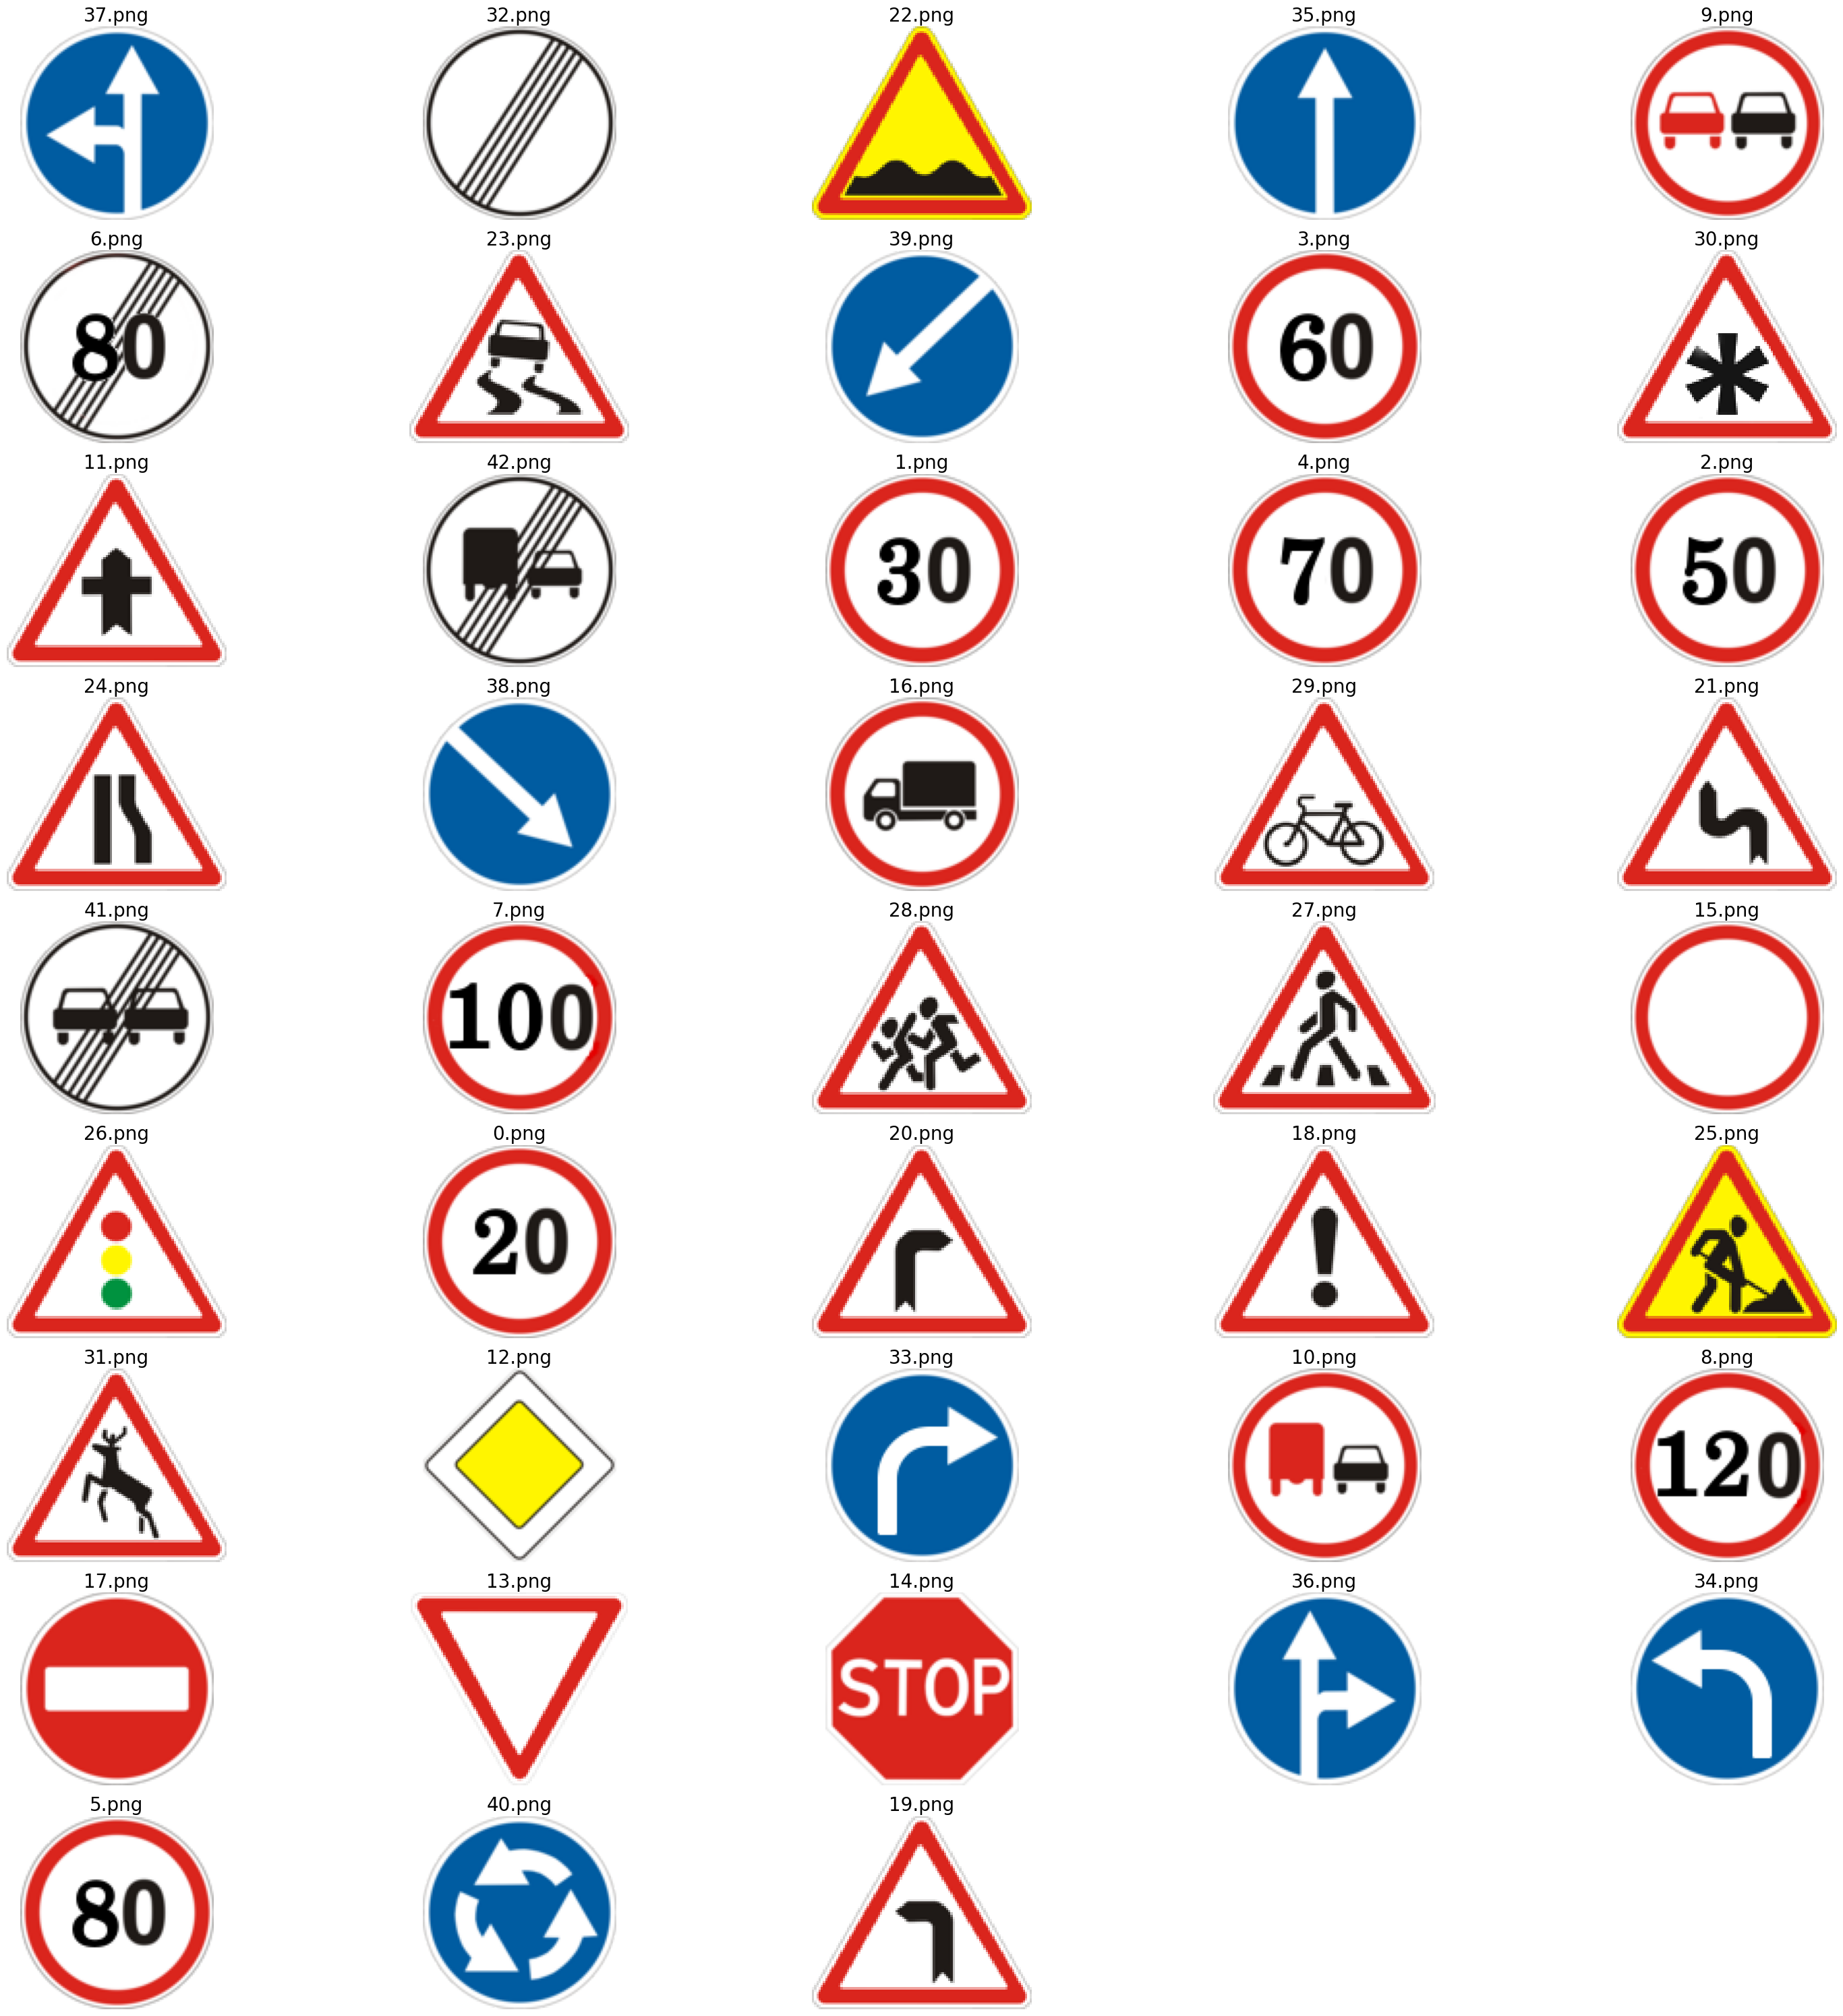

In [ ]:
## Affichage des images de chaque classes dans Méta c'est-à-dire les vrais images qu'on retrouve dans sur le code de la route.

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(path_files +'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [ ]:
## Creation d'un dictionaire des de nos labels
## j'ai choisi de garder les noms des labels en anglais comme dans la description des données.

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
train_df = pd.read_csv(path_files + "Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


# Preprocessing
- Les dimensions moyennes de toutes les images sont d'environ 50x50 pixels.
- Toutes les images sont redimensionnées à (50,50) pixels et sauvegardées comme tableau numpy.
- Les données sont normalisées et les étiquettes sont encodées en One Hot.

In [ ]:
## chek la rapartion des pixels de nos images

print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [ ]:
train_x =[]
train_x

[]

In [ ]:
## Ici nous allons rendre toute les images de train de la même taille c'est-à-dire en 50 pixels sur  50 pixels
train_x =[]
for i in train_df.Path:
    img = Image.open(path_files+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [ ]:
test_df = pd.read_csv(path_files+'Test.csv')
test_df.head()

In [ ]:
## chek la rapartion des pixels de nos images

print(f'minimum width: {test_df.Width.min()}')
print(f'minimum height: {test_df.Height.min()}')
print(f'average width: {test_df.Width.mean()}')
print(f'average height: {test_df.Height.mean()}')

In [ ]:
## Ici nous allons rendre toute les images de test de la même taille c'est-à-dire en 50 pixels sur  50 pixels
test_x =[]
for i in test_df.Path:
    img = Image.open(path_files+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


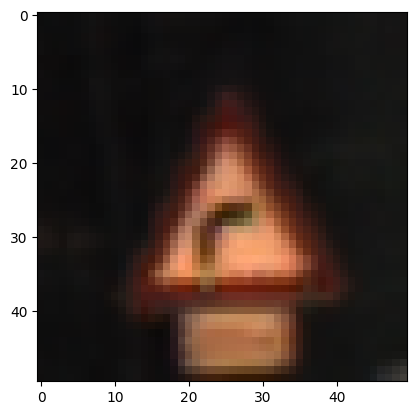

In [ ]:
print(classes[train_y[35]])
plt.imshow(train_x[35])
#plt.axis('off')
plt.show()

In [ ]:
print(classes[train_y[20000]])
plt.imshow(train_x[20000])
#plt.axis('off')
plt.show()

In [ ]:
## Normalisation de données train et test

xtrain = train_x/255
xtest = test_x/255


# One Hot encoding sur les labels

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

print(xtest.shape)
print(ytest.shape)

In [ ]:
# regardons ce que resemble nos images en vrais
import random
plt.rcParams['figure.figsize'] = (9,9) # aggradissement de la figure

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(xtrain))
    plt.imshow(xtrain[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(ytrain[num]))

plt.tight_layout()

# Création de nos modèles CNN
- Les données sont divisées en données de d'entraînement et de validation
- Le modèle CNN contient deux blocs, chacun contenant deux couches convolutionnelles connectées à une couche de Max Pooling.
- Celle-ci est ensuite connectée à un CNN entièrement connecté avec des couches de dropout entre les deux.
- Le modèle est compilé avec un optimiseur SGD et une fonction de perte sous forme d'entropie croisée catégorique.


In [ ]:
## Séparation de notre jeu de données en train et validation.
## l'intérêt de faire cela est de ne pas utiliser les données de test durant l'entraînement du modèle.

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.25, random_state=0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(29406, 50, 50, 3)
(9803, 50, 50, 3)
(29406, 43)
(9803, 43)


In [ ]:
len(xtrain)

In [ ]:
BATCH_SIZE = 32
steps_per_epoch = len(xtrain)//BATCH_SIZE  # len(xtrain)

In [ ]:
#@title visualization utilities [RUN ME]

"""
This cell contains helper functions used for visualization
and downloads only. You can skip reading it. There is very
little useful Keras/Tensorflow code here.
"""
import os, re, math, json, shutil, pprint
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import IPython.display as display
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
print("Tensorflow version " + tf.__version__)

# Matplotlib config
plt.ioff()
plt.rc('image', cmap='gray_r')
plt.rc('grid', linewidth=1)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0', figsize=(16,9))
# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# pull a batch from the datasets. This code is not very nice, it gets much better in eager mode (TODO)
def dataset_to_numpy_util(training_dataset, validation_dataset, N):

  # get one batch from each: 10000 validation digits, N training digits
  batch_train_ds = training_dataset.unbatch().batch(N)

  # eager execution: loop through datasets normally
  if tf.executing_eagerly():
    for validation_digits, validation_labels in validation_dataset:
      validation_digits = validation_digits.numpy()
      validation_labels = validation_labels.numpy()
      break
    for training_digits, training_labels in batch_train_ds:
      training_digits = training_digits.numpy()
      training_labels = training_labels.numpy()
      break

  else:
    v_images, v_labels = validation_dataset.make_one_shot_iterator().get_next()
    t_images, t_labels = batch_train_ds.make_one_shot_iterator().get_next()
    # Run once, get one batch. Session.run returns numpy results
    with tf.Session() as ses:
      (validation_digits, validation_labels,
       training_digits, training_labels) = ses.run([v_images, v_labels, t_images, t_labels])

  # these were one-hot encoded in the dataset
  validation_labels = np.argmax(validation_labels, axis=1)
  training_labels = np.argmax(training_labels, axis=1)

  return (training_digits, training_labels,
          validation_digits, validation_labels)

# create digits from local fonts for testing
def create_digits_from_local_fonts(n):
  font_labels = []
  img = PIL.Image.new('LA', (28*n, 28), color = (0,255)) # format 'LA': black in channel 0, alpha in channel 1
  font1 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'DejaVuSansMono-Oblique.ttf'), 25)
  font2 = PIL.ImageFont.truetype(os.path.join(MATPLOTLIB_FONT_DIR, 'STIXGeneral.ttf'), 25)
  d = PIL.ImageDraw.Draw(img)
  for i in range(n):
    font_labels.append(i%10)
    d.text((7+i*28,0 if i<10 else -4), str(i%10), fill=(255,255), font=font1 if i<10 else font2)
  font_digits = np.array(img.getdata(), np.float32)[:,0] / 255.0 # black in channel 0, alpha in channel 1 (discarded)
  font_digits = np.reshape(np.stack(np.split(np.reshape(font_digits, [28, 28*n]), n, axis=1), axis=0), [n, 28*28])
  return font_digits, font_labels

# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  fig = plt.figure(figsize=(13,3))
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  plt.grid(b=None)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)
  display.display(fig)

# utility to display multiple rows of digits, sorted by unrecognized/recognized status
def display_top_unrecognized(digits, predictions, labels, n, lines):
  idx = np.argsort(predictions==labels) # sort order: unrecognized first
  for i in range(lines):
    display_digits(digits[idx][i*n:(i+1)*n], predictions[idx][i*n:(i+1)*n], labels[idx][i*n:(i+1)*n],
                   "{} sample validation digits out of {} with bad predictions in red and sorted first".format(n*lines, len(digits)) if i==0 else "", n)

def plot_learning_rate(lr_func, epochs):
  xx = np.arange(epochs+1, dtype=np.float)
  y = [lr_decay(x) for x in xx]
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.set_xlabel('epochs')
  ax.set_title('Learning rate\ndecays from {:0.3g} to {:0.3g}'.format(y[0], y[-2]))
  ax.minorticks_on()
  ax.grid(True, which='major', axis='both', linestyle='-', linewidth=1)
  ax.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
  ax.step(xx,y, linewidth=3, where='post')
  display.display(fig)

class PlotTraining(tf.keras.callbacks.Callback):
  def __init__(self, sample_rate=1, zoom=1):
    self.sample_rate = sample_rate
    self.step = 0
    self.zoom = zoom
    self.steps_per_epoch = len(xtrain)//BATCH_SIZE # len(xtrain)== 31367

  def on_train_begin(self, logs={}):
    self.batch_history = {}
    self.batch_step = []
    self.epoch_history = {}
    self.epoch_step = []
    self.fig, self.axes = plt.subplots(1, 2, figsize=(18, 10))
    plt.ioff()

  def on_batch_end(self, batch, logs={}):
    if (batch % self.sample_rate) == 0:
      self.batch_step.append(self.step)
      for k,v in logs.items():
        # do not log "batch" and "size" metrics that do not change
        # do not log training accuracy "acc"
        if k=='batch' or k=='size':# or k=='acc':
          continue
        self.batch_history.setdefault(k, []).append(v)
    self.step += 1

  def on_epoch_end(self, epoch, logs={}):
    plt.close(self.fig)
    self.axes[0].cla()
    self.axes[1].cla()

    self.axes[0].set_ylim(0, 1.2/self.zoom)
    self.axes[1].set_ylim(1-1/self.zoom/2, 1+0.1/self.zoom/2)

    self.epoch_step.append(self.step)
    for k,v in logs.items():
      # only log validation metrics
      if not k.startswith('val_'):
        continue
      self.epoch_history.setdefault(k, []).append(v)

    display.clear_output(wait=True)

    for k,v in self.batch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.batch_step) / self.steps_per_epoch, v, label=k)

    for k,v in self.epoch_history.items():
      self.axes[0 if k.endswith('loss') else 1].plot(np.array(self.epoch_step) / self.steps_per_epoch, v, label=k, linewidth=3)

    self.axes[0].legend()
    self.axes[1].legend()
    self.axes[0].set_xlabel('epochs')
    self.axes[1].set_xlabel('epochs')
    self.axes[0].minorticks_on()
    self.axes[0].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[0].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    self.axes[1].minorticks_on()
    self.axes[1].grid(True, which='major', axis='both', linestyle='-', linewidth=1)
    self.axes[1].grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
    display.display(self.fig)

In [ ]:
# Un prmeier modèle avec les paramètres de convolutions
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization

model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=1, activation='relu', padding='valid', input_shape=(50, 50, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', padding='valid'))
model.add(MaxPool2D((2, 2), padding='valid'))
model.add(BatchNormalization())
keras.layers.Activation('relu')
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu', padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu', padding='valid'))
model.add(MaxPool2D((2, 2), padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
keras.layers.Activation('relu')
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 22, 22, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        1

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
plot_training = PlotTraining(sample_rate=10, zoom=1)

In [ ]:
## Fitting the model, with early stopping callback
%%time
#earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights =True)
BATCH_SIZE = BATCH_SIZE
steps_per_epoch = len(xtrain)//BATCH_SIZE  # len(xtrain)
print("Steps per epoch: ", steps_per_epoch)
print("the batch size is ", BATCH_SIZE )
history = model.fit(xtrain,ytrain, epochs=30,
                          batch_size  = BATCH_SIZE,
                         steps_per_epoch = steps_per_epoch,
                         validation_data=(xvalid,yvalid),
                        # callbacks=[earlystop_cb],
                          callbacks=[plot_training])

In [ ]:
model.save('model_GTSRB_with_padding_strides.h5')

In [ ]:
pd.DataFrame(history.history).plot()

<Axes: >

# Evaluating model performance and making predictions

In [ ]:
## Évaluation du modèle

loss, accuracy = model.evaluate(xtest,ytest)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 2s 5ms/step - loss: 0.1422 - accuracy: 0.9698
Loss = 0.14
accuracy = 96.98%


In [ ]:
## Prédictions

prob = model.predict(xtest)
pred = np.argmax(prob, axis=-1)

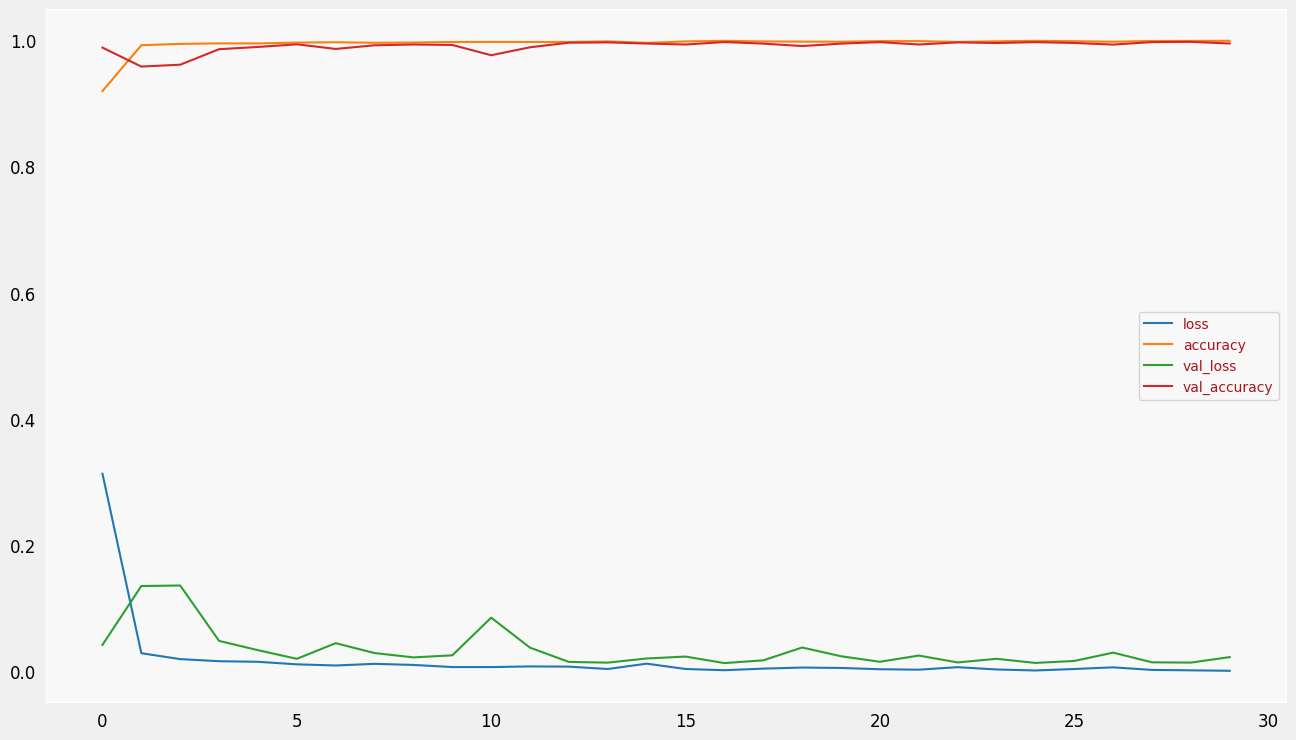

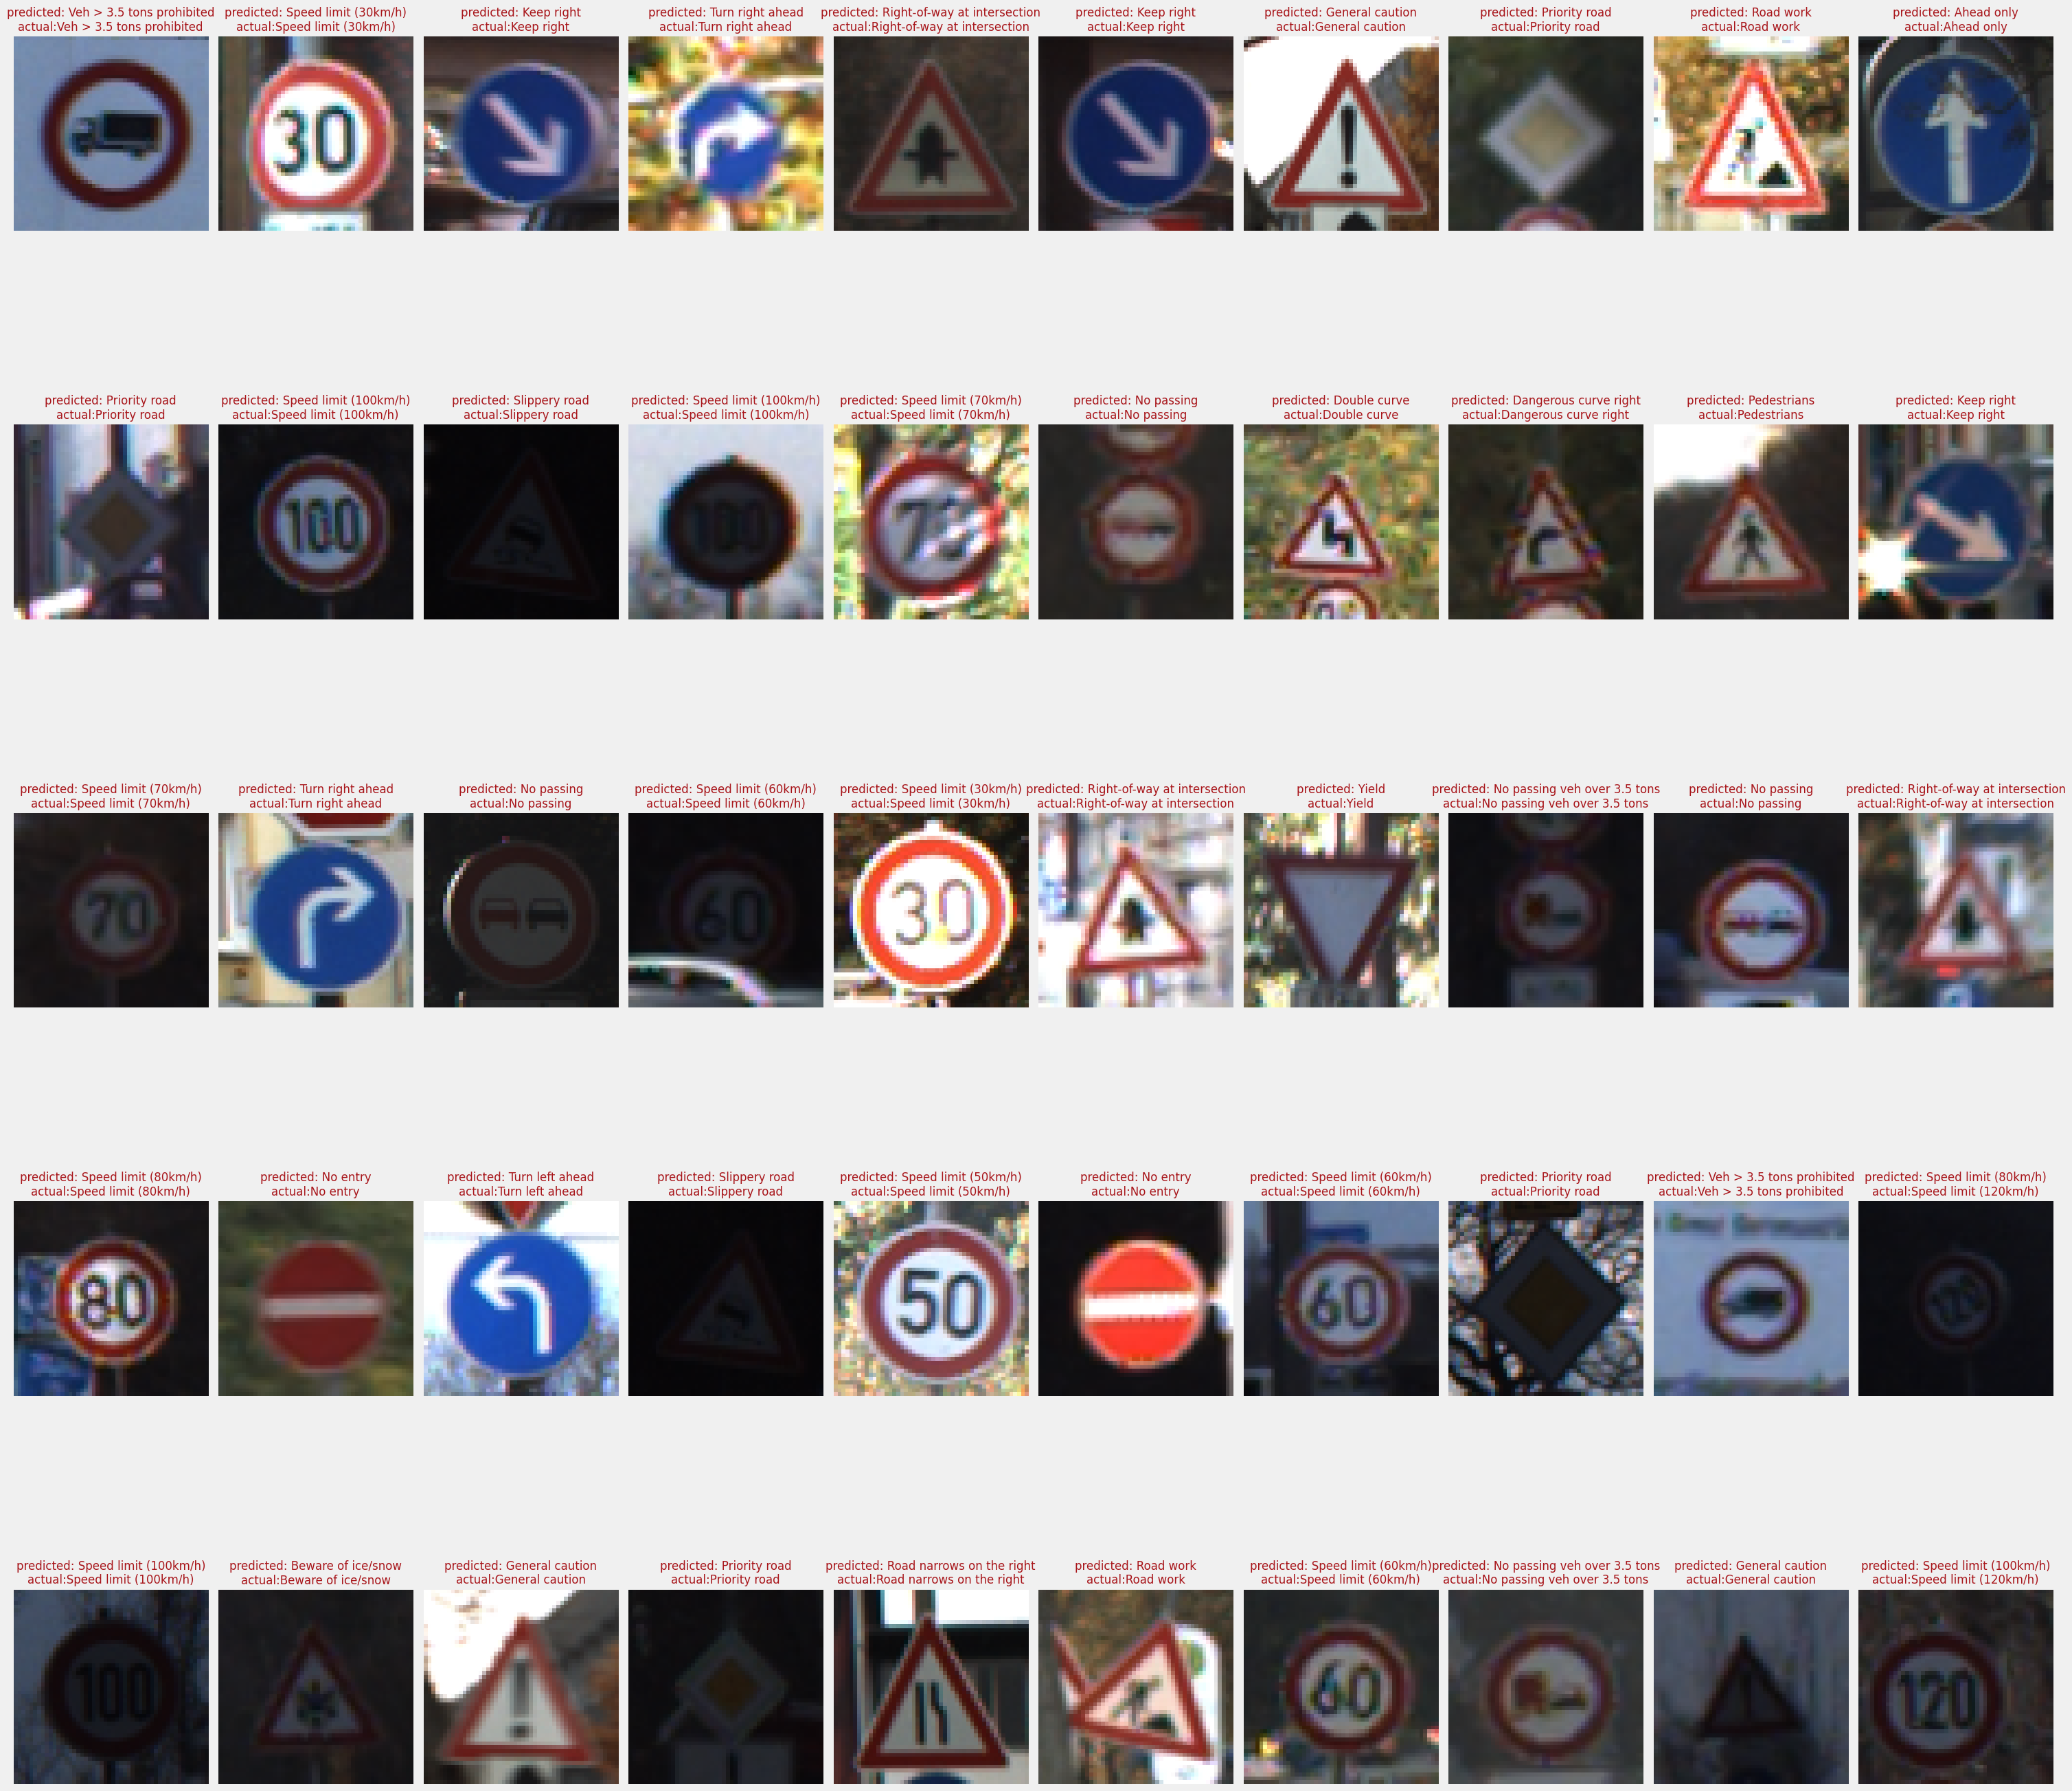

In [ ]:
# print(prob[1])
plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Matrice de confusion

In [ ]:
labels = test_df["ClassId"].values
print("len of label is ",len(labels))
print("len of pred is ",len(pred))
print("len dtype is ",labels.dtype)
print("pred dtype is ",pred.dtype)
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## Prédiction sur les données test  

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(xtest[start_index + i])
plt.show()